In [1]:
#| code-summary: Load Packages
#| code-fold: true

# numerical calculation & data frames
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so

# statistics
import statsmodels.api as sm


In [2]:
#| echo: false
from IPython.display import display, HTML
HTML('<style>.output {flex-direction: row;}</style>')
pd.options.display.notebook_repr_html = False

In [3]:
#| code-summary: Options
#| code-fold: true

# pandas options
pd.set_option("mode.copy_on_write", True)
pd.options.display.precision = 2
pd.options.display.float_format = '{:.2f}'.format  # pd.reset_option('display.float_format')
pd.options.display.max_rows = 6

# Numpy options
np.set_printoptions(precision = 2, suppress=True)

## MovieLens 1M Dataset
Source: [MovieLens 1M movie ratings](https://grouplens.org/datasets/movielens/1m/)  
McKinney’s: 13. Data Analysis Examples

1990년대 후반에서 2000년대 초반의 영화 평가에 대한 3개의 relational data로 이루어져 있고,  
`user_id`, `movie_id`의 keys로 연결되어 있습니다.

- `users`: 유저에 대한 정보
- `ratings`: 평점에 대한 정보
- `movies`: 영화에 대한 정보

![](images/movielens.png){width=650}

아래 데이터 링크가 원활하지 않을 시, 위의 MovieLens 1M movie ratings 사이트에서 직접 다운받으세요.

In [4]:
unames = ["user_id", "gender", "age", "occupation", "zip"]
users = pd.read_table(
    "https://raw.githubusercontent.com/wesm/pydata-book/3rd-edition/datasets/movielens/users.dat",
    sep="::",
    header=None,
    names=unames,
    engine="python",
)
users

      user_id gender  age  occupation    zip
0           1      F    1          10  48067
1           2      M   56          16  70072
2           3      M   25          15  55117
...       ...    ...  ...         ...    ...
6037     6038      F   56           1  14706
6038     6039      F   45           0  01060
6039     6040      M   25           6  11106

[6040 rows x 5 columns]

In [5]:
rnames = ["user_id", "movie_id", "rating", "timestamp"]
ratings = pd.read_table(
    "https://raw.githubusercontent.com/wesm/pydata-book/3rd-edition/datasets/movielens/ratings.dat",
    sep="::",
    header=None,
    names=rnames,
    engine="python",
)
ratings

         user_id  movie_id  rating  timestamp
0              1      1193       5  978300760
1              1       661       3  978302109
2              1       914       3  978301968
...          ...       ...     ...        ...
1000206     6040       562       5  956704746
1000207     6040      1096       4  956715648
1000208     6040      1097       4  956715569

[1000209 rows x 4 columns]

In [6]:
mnames = ["movie_id", "title", "genres"]
movies = pd.read_table(
    "https://raw.githubusercontent.com/wesm/pydata-book/3rd-edition/datasets/movielens/movies.dat",
    sep="::",
    header=None,
    names=mnames,
    engine="python",
)
movies.head(6)

   movie_id                               title                        genres
0         1                    Toy Story (1995)   Animation|Children's|Comedy
1         2                      Jumanji (1995)  Adventure|Children's|Fantasy
2         3             Grumpier Old Men (1995)                Comedy|Romance
3         4            Waiting to Exhale (1995)                  Comedy|Drama
4         5  Father of the Bride Part II (1995)                        Comedy
5         6                         Heat (1995)         Action|Crime|Thriller

___

1. `ratings`과 `users` 데이터를 merge한 후 다음과 같은 `user_rating` 데이터셋을 만드세요.

```python
#          user_id gender  age  occupation    zip  movie_id  rating  timestamp
# 0              1      F    1          10  48067      1193       5  978300760
# 1              1      F    1          10  48067       661       3  978302109
# 2              1      F    1          10  48067       914       3  978301968
# ...          ...    ...  ...         ...    ...       ...     ...        ...
# 1000206     6040      M   25           6  11106       562       5  956704746
# 1000207     6040      M   25           6  11106      1096       4  956715648
# 1000208     6040      M   25           6  11106      1097       4  956715569
```

2. 다음과 같이 영화(`movie_id`)별로 남녀(`gender`)에 따른 `rating`의 평균과 그 개수(`count`)을 구해보세요.

```python
#    movie_id gender  mean  count
# 0         1      F  4.19    591
# 1         1      M  4.13   1486
# 2         2      F  3.28    176
# 3         2      M  3.18    525
# 4         3      F  3.07    136
# 5         3      M  2.99    342
...
```

3. 다음과 같은 플랏을 그려보고 같이 평가의 수가 적을수록 그 편차가 커지는 현상을 확인해보세요. 
   
   - 혹시, 평가의 수가 많은 영화일수록 평가가 높아지는 현상에 대해 설명할 수 있을까요? 
   - 또한, 남녀의 평가에 차이가 벌어지는 현상을 설명할 수 있을까요?

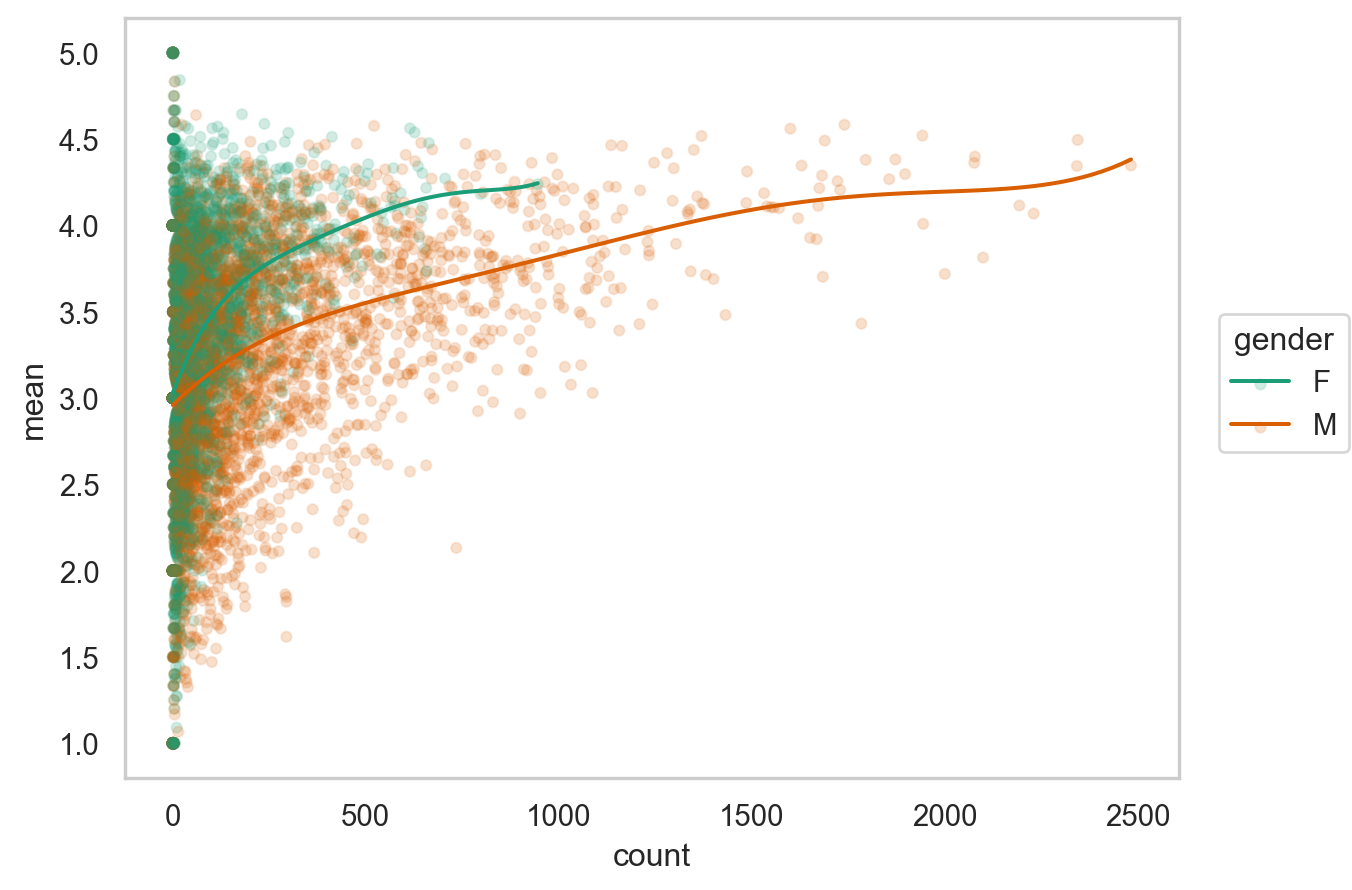

In [61]:
#| echo: false
(
    so.Plot(mean_ratings, x="count", y="mean", color="gender")
    .add(so.Dots(alpha=.1))
    .add(so.Line(), so.PolyFit(5))
    .scale(color="Dark2")
).theme({"axes.facecolor": "w", "axes.edgecolor": ".8"})

4. 3번에서 플랏에 `.limit(x=(0, 500), y=(2.5, 4.5))`을 추가하여 평가 개수(`count`)가 0에서 500사이이고, 평균 rating이 2.5에서 4.5 사이인 것으로 확대해서 보고, 평가 개수가 몇 개 정도부터 남녀의 평가의 차이가 대략 일정하게 되는지 살펴보세요.

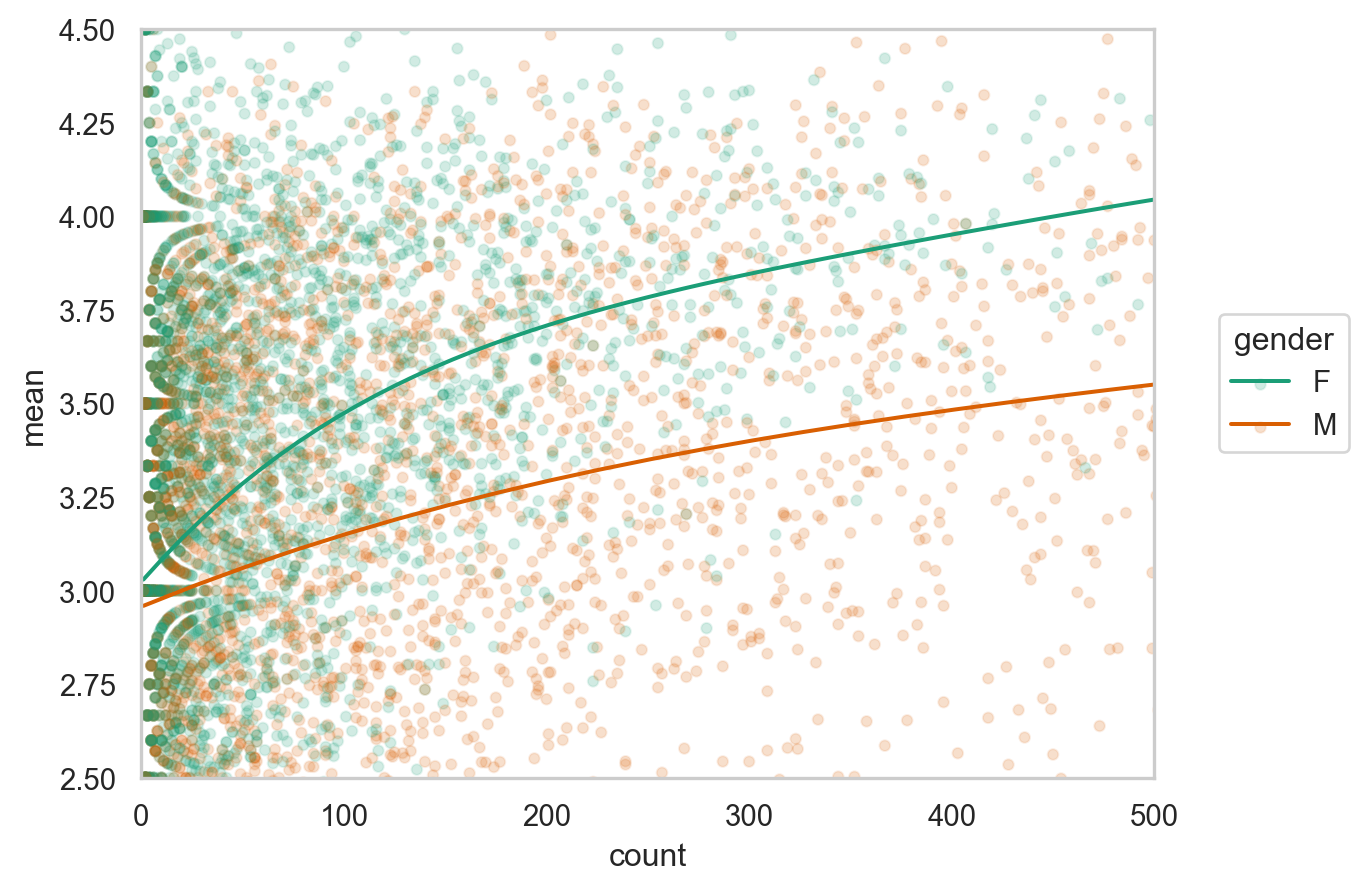

In [62]:
#| echo: false
(
    so.Plot(mean_ratings, x="count", y="mean", color="gender")
    .add(so.Dots(alpha=.1))
    .add(so.Line(), so.PolyFit(5))
    .scale(color="Dark2")
    .limit(x=(0, 500), y=(2.5, 4.5))
    .theme({"axes.facecolor": "w", "axes.edgecolor": ".8"})
)

5. 영화별로 남녀의 평가가 크게 갈리는 영화들을 찾기 위해
   
   - 5.1 2번에서 구한 데이터에서 **남녀 모두** rating이 300개 이상 있는 영화로만 간추려보세요.  
   - 5.2 이 데이터를 `popular_movies`라고 명명하고,  
     - 이 데이터를 `gender`에 관해 wide format으로 변환한 후; `pivot()`을 이용  
      - 여자의 평균 rating에서 남자의 평균 rating을 뺀 그 차이를 데이터에 추가한 후; `assign()`을 이용
      - 그 차이로 sort한 후,
   - 5.3 여자의 선호가 더 높은 영화 5편과 남자의 선호가 더 높은 영화 5편 (선호 차이의 크기 순서로)을 구해보세요.  
     - 이를 위해서 `movies` 테이블 안의 영화제목(`title`)을 `merge()`를 이용해 추가하세요.


6. 3번 플랏에서 유추되듯이 평가의 개수가 영화의 완성도 혹은 인기도를 파악할 수 있는 대략적인 지표가 될 수 있습니다. 즉, 평가수가 많을 수록 평점도 높습니다. 따라서 평가 개수를 바탕으로 인기도(`popularity`)를 수치화 하려고 합니다.
   - 우선, 3번 플랏에서 평가수가 같다면 여성이 더 높은 평점을 주는 것으로 보이는데, 이 현상을 다음과 같이 자세히 들여다 봅니다.
     - 다음과 같은 `count`를 20개의 구간으로 discretize해주는 함수를 **성별로 grouping**된 `user_rating` 데이터에 `apply()` 하세요.
  
        ```python
        def popular(g):
            g["popularity"] = pd.qcut(g["count"], q=20, labels=False)
            return g
        ```
    - 이 함수의 의미를 파악하고, 20단계 (0, 1, 2, ..., 19)의 popularity가 성별을 고려하여 각 영화에 부여되었음을 이해합니다. (각각은 평가 개수 5%에 해당)
    - 이제, 다음과 같이 `popularity`에 따라 평점이 높아지는 현상을 성별을 고려한 후 본 결과를 아래와 같이 플랏을 통해 확인해봅니다.
    - 남성 유저와 여성 유저의 비율에 큰 차이 (4331:1709)가 있는 것을 고려했을 때, 어떻게 이  현상을 설명할 수 있을까요?

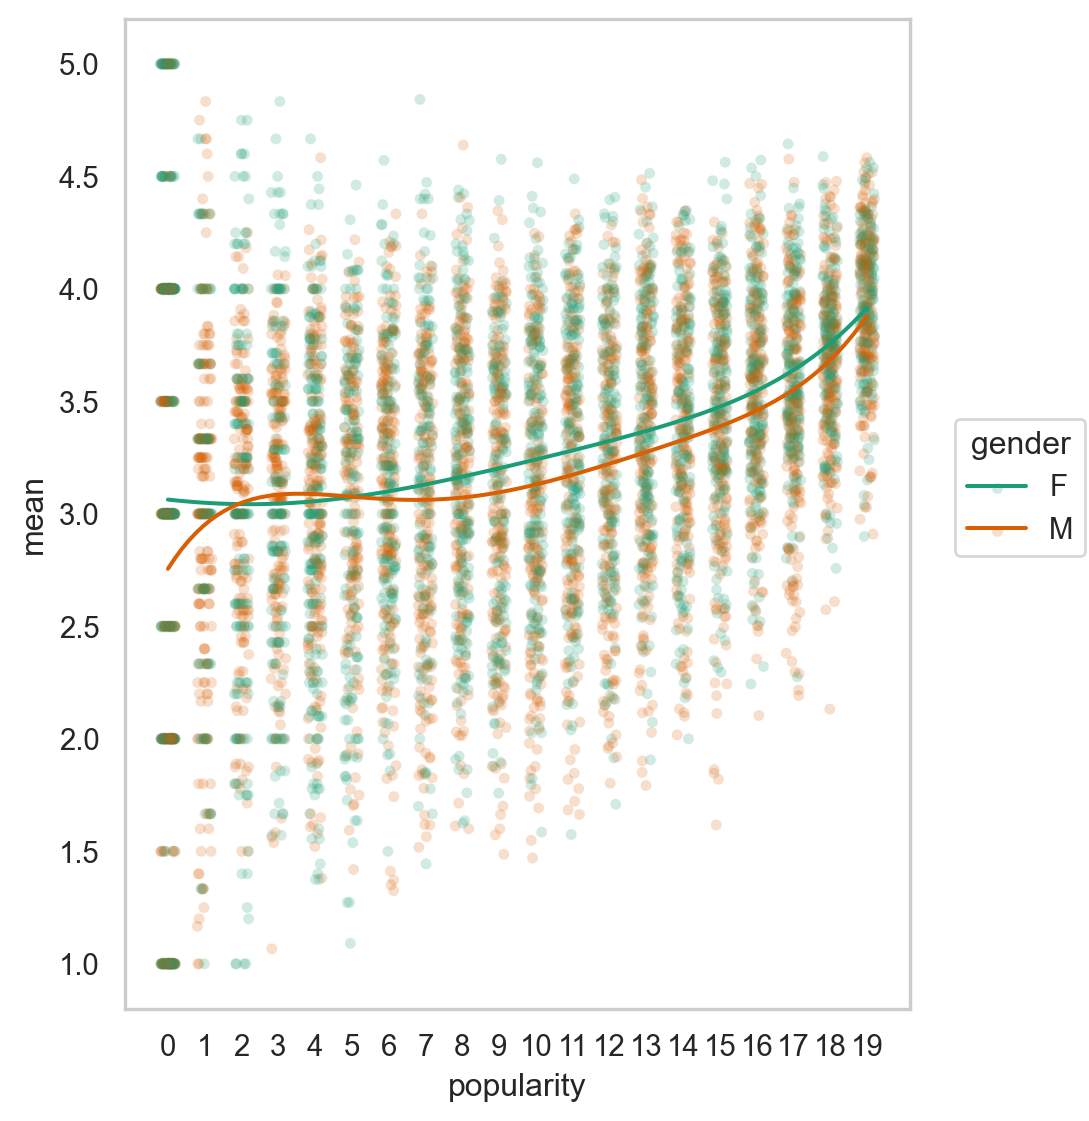

In [63]:
#| echo: false
(
    so.Plot(popularity, x="popularity", y="mean", color="gender")
    .add(so.Dots(alpha=0.01), so.Jitter(width=.5))
    .add(so.Line(), so.PolyFit(5))
    .scale(x=so.Continuous().tick(at=np.arange(20)))
    .layout(size=(5, 6))
    .scale(color="Dark2")
).theme({"axes.facecolor": "w", "axes.edgecolor": ".8"})

7. 남녀별로 평점의 편차가 큰, 즉 의견이 분분한 영화들을 구해봅니다.
   
   - 5번에서 구한 `popular_movies`에 한해 남녀 각각에 대해 영화별로 평점의 편차를 표준편차로 구해보고,
     - 5번을 못 구한 경우, 다음 [파일](https://www.dropbox.com/s/f2qu13s9z6kv25f/popular_movies.csv?dl=1)을 다운로드 받아 `popular_movies`로 사용합니다.
   - 남녀별로 편차 상위 2개만 표시합니다. (동등한 순서 모두 포함)
      - 다음 method를 이용하는 함수를 정의하고 `apply()`로 적용해 봅니다.
  
         ```python
         df.nlargest(n, "var", keep="all")
         ```
   - 영화제목을 `movies` 데이터와 merge하여 표시합니다.

8. 이제 초점을 유저들에게 돌려, 유저들의 특성을 고려해봅니다. 일반적으로 같은 소스(사람)에서 온 데이터는 비슷한 성향을 띄는데 이를 **depenency**의 문제라고 합니다. 한 가족 구성원으로부터 왔다든가, 같은 학교의 학생들과 같이 구체적으로 명시하기 어렵지만 데이터 상에서 비슷한 군집을 이룹니다. 이 데이터의 경우 동일한 유저들의 특성이 존재할 수 있는데, 예를 들어 후한 점수를 준다든가, 같은 유저라도 어떤 장르의 영화는 매우 낮은 평점을 준다든가 하는 현상이 있을 수 있는데 이를 알아봅니다.
   
   - 8.1 우선 개인별(성별로 나눠)로 몇 개정도나 평점을 주었는지 분포를 살펴봅니다.
   - 8.2 개인별로 평점의 평균(`mean`)과 표준편차(`std`), 개수(`count`)를 구합니다; 성별 차는 없는 것으로 간주함
   - 8.3 이 세 변수의 관계를 보기 위해, 평점 개수(`count`)를 10개의 구간으로 `pd.cut`을 이용해 discretize해서 살펴봅니다.
     - 8.1에서 분포를 살펴보았으면, 개수를 먼저 log 스케일로 변환해서 구간으로 쪼개는 것이 유리함을 알 것입니다. (`np.log` 이용)
     - 즉, 대다수는 2백개 이하의 평점을 남긴 반면, 소수의 유저들 중에는 수천개의 평점을 남긴 사람도 있습니다.
     - 10개 구간으로 discretized된 (log) `count`를 `.facet`을 이용해 아래와 같이 유저들 각자의 평점 평균과 표준편차의 관계를 살펴봅니다; (아래 플랏은 데이터를 적절히 필터링 한 결과입니다.)
     - **평점을 얼마나 많이 남겼는지와 관계없이** 비슷한 현상이 나타나는데 이 현상을 설명할 수 있을까요?
     - 평균적으로 낮은 평점을 준 소위 짠 유저들이 더 비판적이고 고민끝에 평점을 준 것이라고 추측할 수 있을까요?  

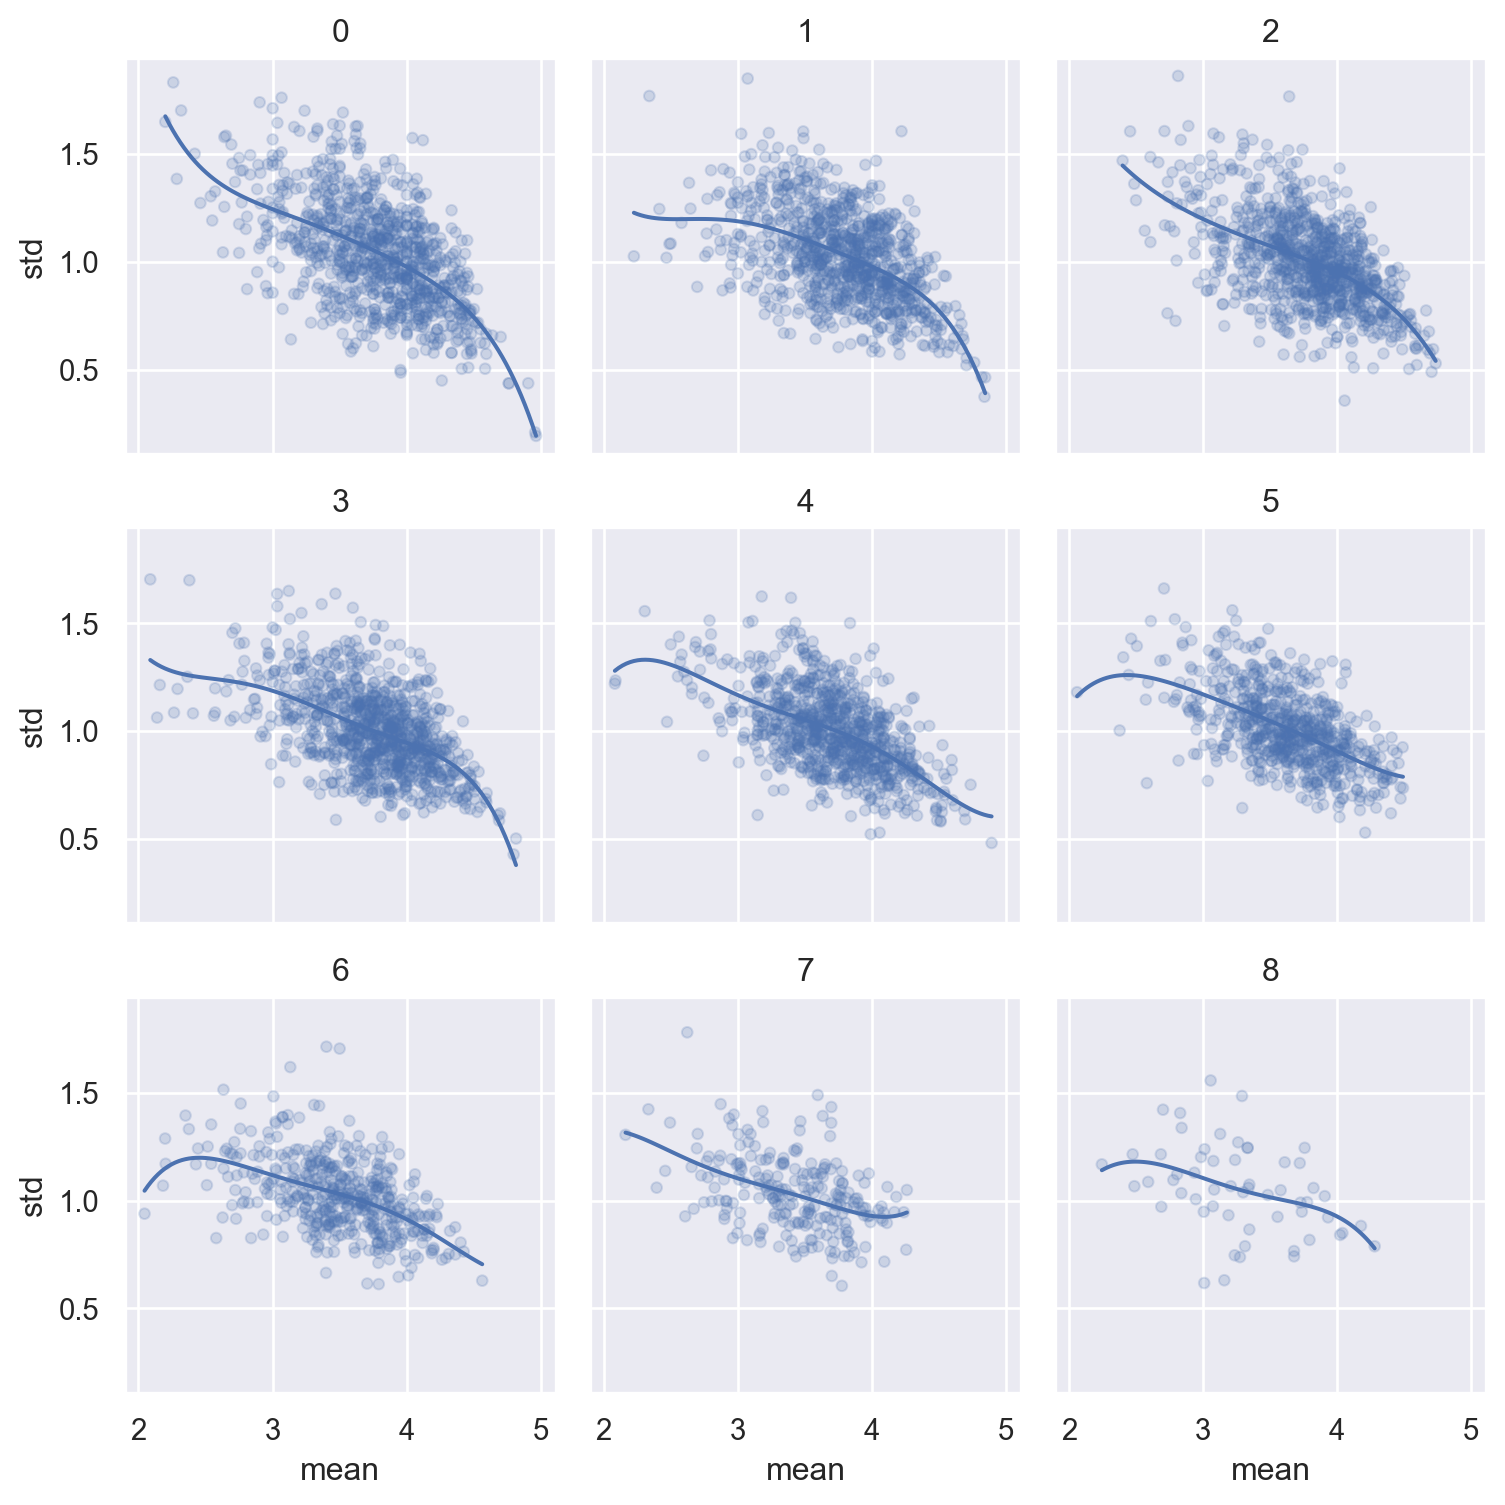

In [64]:
#| echo: false
(
    so.Plot(user_stats.query('mean > 2 & lcount_cat < 9'), x="mean", y="std")
    .add(so.Dots(alpha=.2))
    .add(so.Line(), so.PolyFit(5))
    .facet("lcount_cat", wrap=3)
    .layout(size=(8, 8))
)

9. 장르별로 남녀의 선호 차이를 두 관점 1) 평점의 개수/비율, 2) 평점의 평균의 관점에서 따로 살펴봅니다.
    - `movies` 데이터에서 장르(`genres`)는 여러 장르에 포함되는 것을 | 기호로 나누어 표기되어 있고, 분석을 위해서 다음 코드를 이용해 long format으로 각 장르가 열에 한번씩만 나오도록 다음과 같이 바꾸세요.

        ```python
        movies_long = movies.copy()

        movies_long["genres"] = movies_long["genres"].str.split("|")
        movies_long = movies_long.explode("genres")

        movies_long.head(8)
        #    movie_id                    title      genres
        # 0         1         Toy Story (1995)   Animation
        # 0         1         Toy Story (1995)  Children's
        # 0         1         Toy Story (1995)      Comedy
        # 1         2           Jumanji (1995)   Adventure
        # 1         2           Jumanji (1995)  Children's
        # 1         2           Jumanji (1995)     Fantasy
        # 2         3  Grumpier Old Men (1995)      Comedy
        # 2         3  Grumpier Old Men (1995)     Romance
        ```

이 `movie_long`과 1번에서 만든 `user_rating`을 merge한 후 다음 문제를 이어가세요.

9.1 장르별로 평점의 **개수**를 간단히 플랏으로 살펴보는데 남녀 별로 따로 비율이 나오도록 해보세요.

  - `so.Hist("proportion", common_norm=False)`이 필요할 수 있음


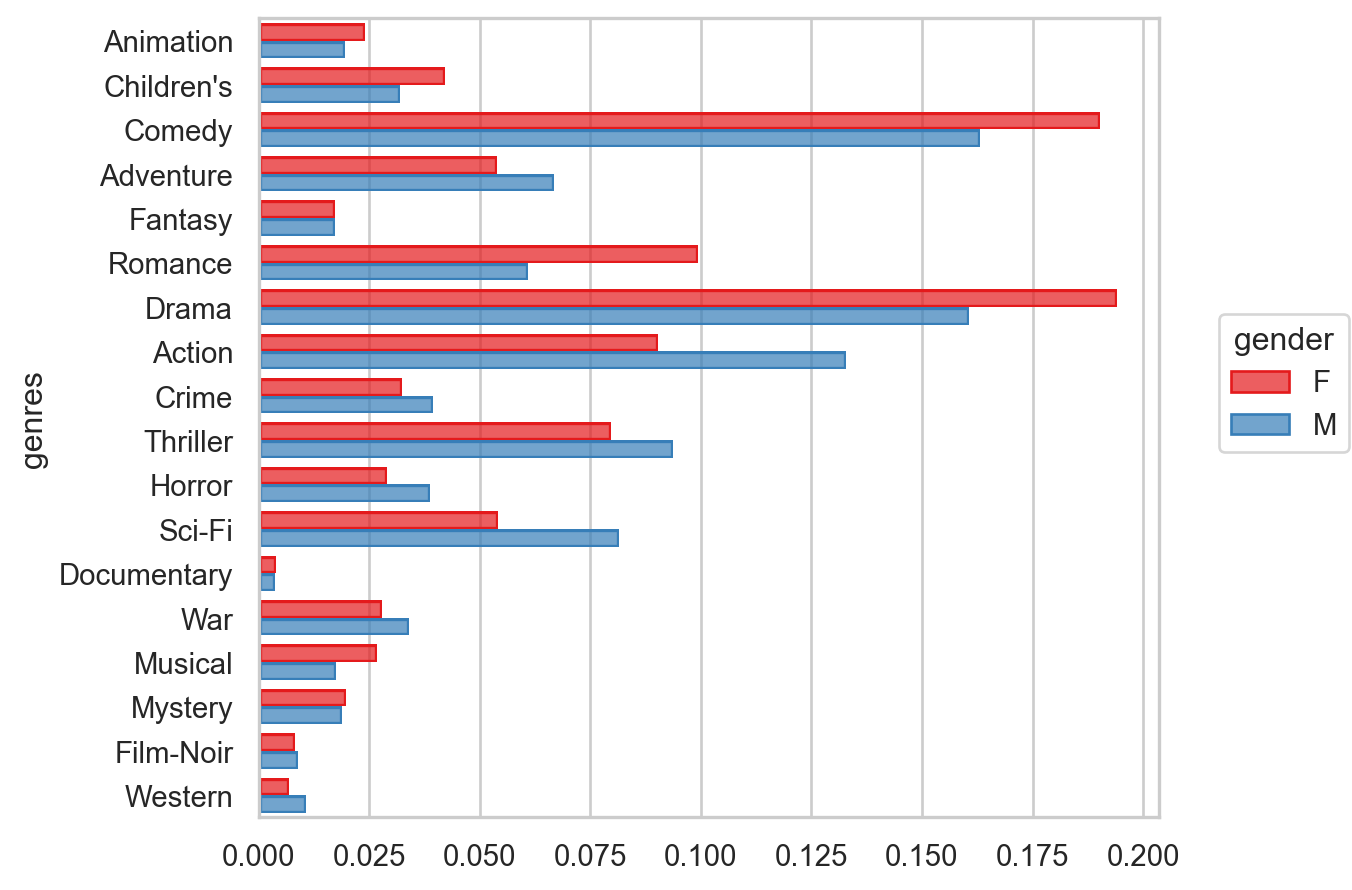

In [87]:
#| echo: false
(
    so.Plot(movies_long_all, y="genres", color="gender")
    .add(so.Bar(), so.Hist("proportion", common_norm=False), so.Dodge())
    .scale(color="Set1")
    .theme({**sns.axes_style("whitegrid")})
)

9.2 이번에는 장르별로 평점의 **평균**를 남녀별로 간단히 플랏으로 확인해보세요.

-  `so.Agg()`를 활용하고,
-  `.limit(x=(3, 4.2))`를 써서 확대해서 살펴보세요.

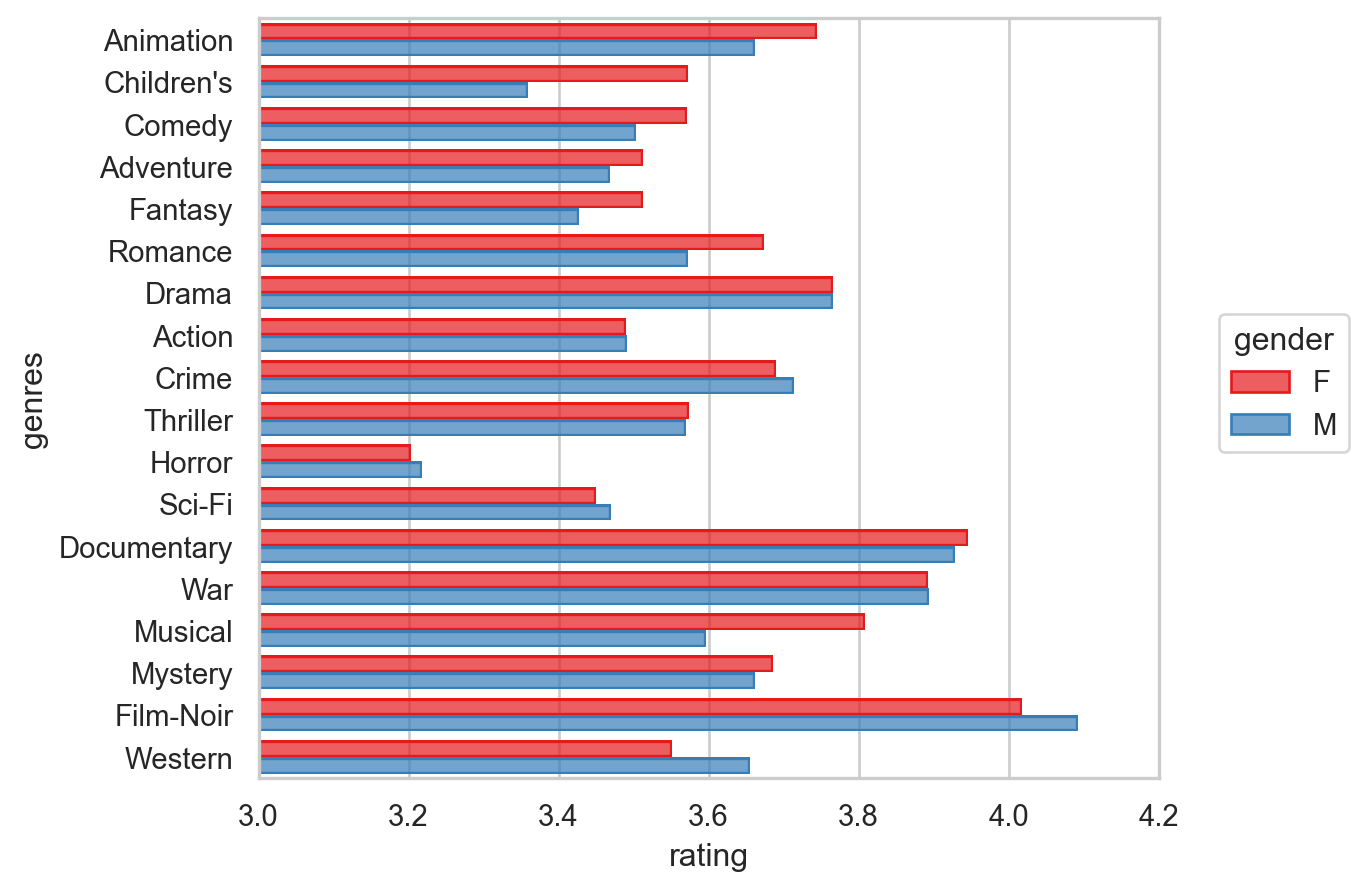

In [93]:
#| echo: false
(
    so.Plot(movies_long_all, y="genres", x="rating", color="gender")
    .add(so.Bar(), so.Agg(), so.Dodge())
    .limit(x=(3, 4.2))
    .scale(color="Set1")
    .theme({**sns.axes_style("whitegrid")})
)

9.3 위의 플랏에서 살펴본 **평균** 평점의 값을 직접 구해봅니다. 장르별, 남녀로 그룹핑을 하여 **평균** 평점을 다음과 같이 나오도록 구해보세요.

- `unstack()`을 활용해 보세요.

```python
# gender       genre    F    M
# 0           Action  ...  ...
# 1        Adventure  ...  ...
# ..             ...  ...  ...
# 16             War  ...  ...
# 17         Western  ...  ...
```

9.4 영화별 남녀의 평균 평점의 차이(Female - Male) 순으로 **정렬된** 플랏을 대략적으로 다음과 같이 그려봅니다.

- Customizing할 때, `.limit(x=(3, 4.2))`과 `.scale(y=so.Nominal(order=[]))`이 필요할 수 있습니다.

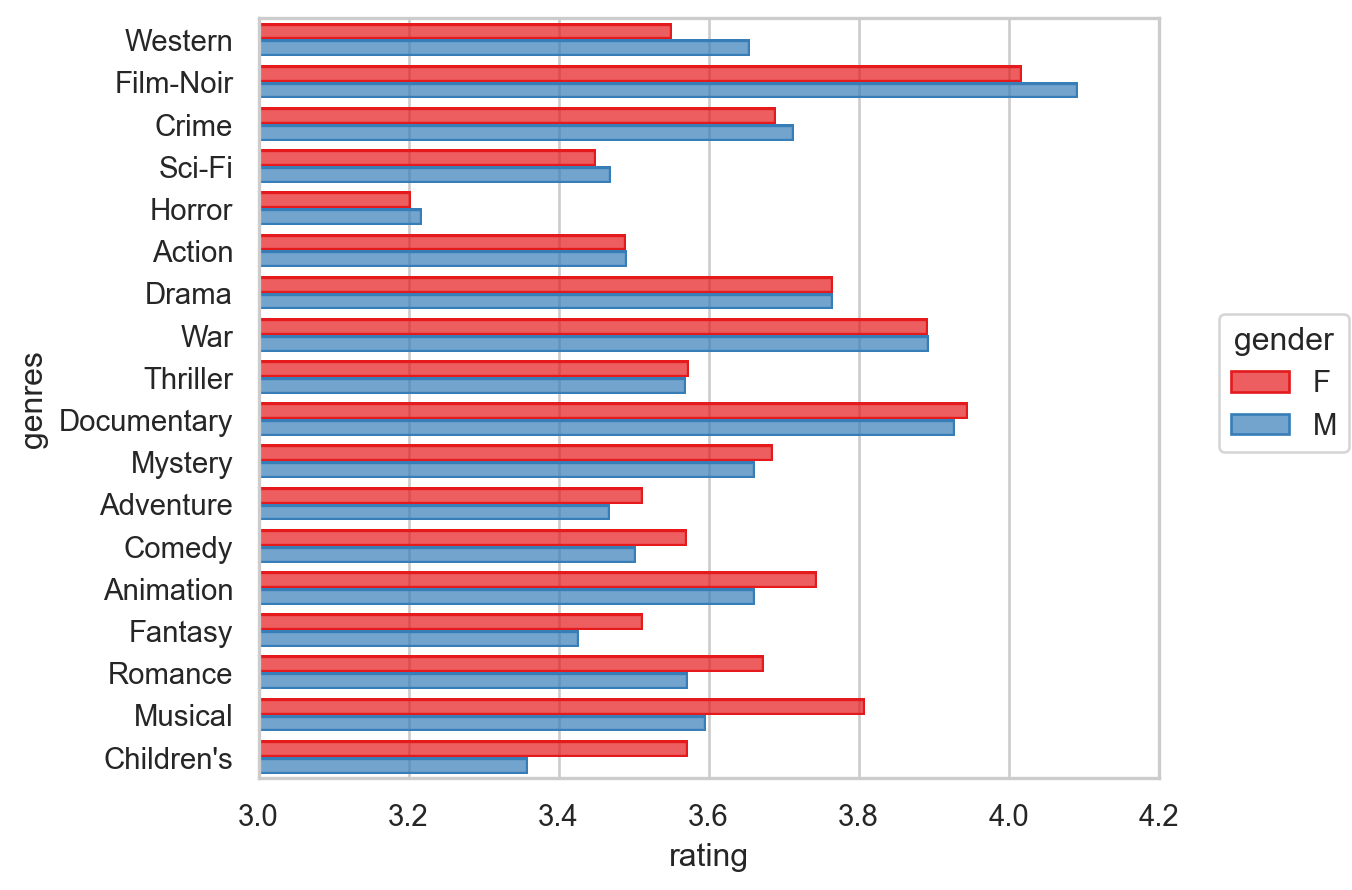

In [104]:
#| echo: false
(
    so.Plot(genre_gender_mean, y="genres", x="rating", color="gender")
    .add(so.Bar(), so.Dodge())
    .scale(
        y=so.Nominal(order=genre_gender_diff["genres"].values),
    )
    .limit(x=(3, 4.2))
    .scale(color="Set1")
    .theme({**sns.axes_style("whitegrid")})
)

9.5 평점의 장르별 분포를 boxplot으로 볼 수도 있지만, 대신 seaborn.object의 `Range()`를 써서 평균과 표준편차를 다음과 같이 그려보세요.

- range는 `.add(so.Range(), so.Est("mean", errorbar="sd"))`를 활용하고
- 평균은 `Agg()`을 이용해 표시합니다.

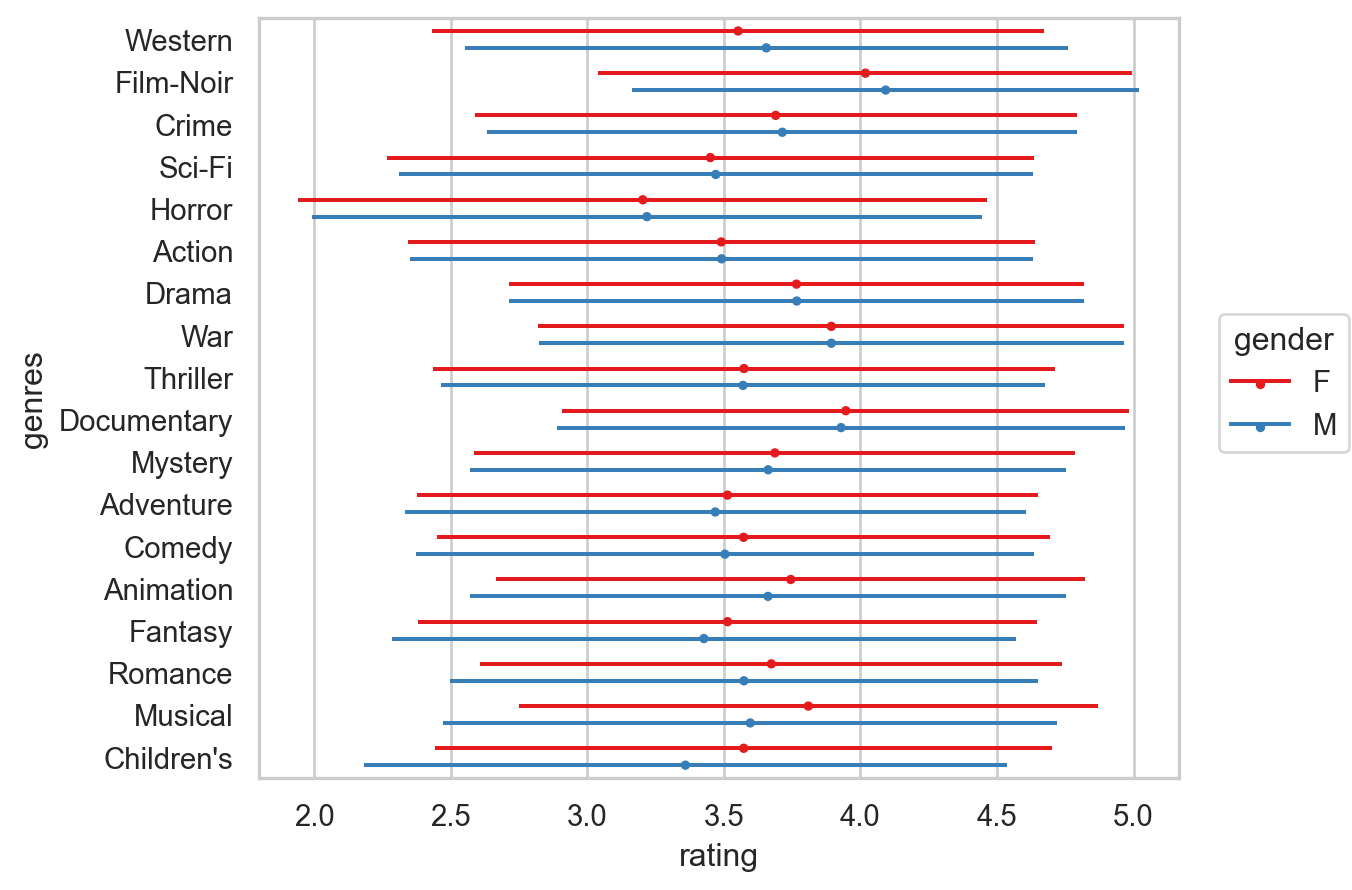

In [107]:
#| echo: false
(
    so.Plot(movies_long_all, x="rating", y="genres", color="gender")
    .add(so.Range(), so.Est("mean", errorbar="sd"), so.Dodge())
    .add(so.Dot(pointsize=3), so.Agg("mean"), so.Dodge())
    .scale(
        y=so.Nominal(order=genre_gender_diff["genres"].values),
        color="Set1"
    )
    .theme({**sns.axes_style("whitegrid")})
)

10. 장르별로 나이대에 따른 영화시청에 차이가 있는지 살펴봅니다. 나이는 다음과 같이 코딩되어 있습니다.
    
* 1:  "Under 18"
* 18:  "18-24"
* 25:  "25-34"
* 35:  "35-44"
* 45:  "45-49"
* 50:  "50-55"
* 56:  "56+"

9번에서 데이터를 만들지 못한 경우 경우, 다음 .parquet [파일](https://www.dropbox.com/s/urchxe0n7g7w8np/movies_long_all.parquet?dl=1)을 받아 이용해 다음 문제를 이어가세요.
```python
pd.read_parquet("data/movies_long_all.parquet")
```

10.1 우선, 위에서 western 장르가 남녀의 평점 차이가 가장 크게 나타나 남성이 선호하는 것으로 보이는데 western 장르만 따로 떼어 나이대/남녀 별로 rating에 차이가 있는지 살펴봅니다.

- 우선 scatterplot으로 살펴보는 것이 유용한지 체크해보세요.
- 개선할 방법이 있을까요?
- Fitted line만을 `so.PolyFit(5)`을 이용하여 다음과 같이 그려보세요.
  - x축 눈금은 `.scale(x=so.Continuous().tick(at=[1, 18, 25, 35, 45, 50, 56]))`
  
- 어떤 점을 파악할 수 있나요?

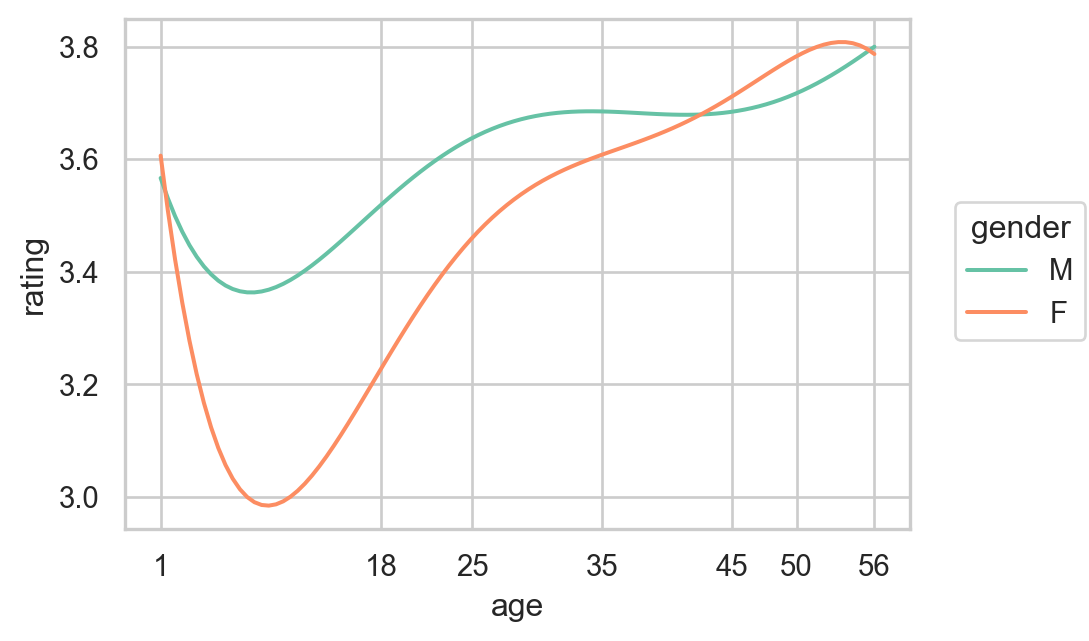

In [56]:
#| echo: false
(
    so.Plot(western, x="age", y="rating", color="gender")
    .add(so.Line(), so.PolyFit(5))
    .scale(color="Set2")
    .theme({**sns.axes_style("whitegrid")})
    .layout(size=(5, 3.5))
    .scale(x=so.Continuous().tick(at=[1, 18, 25, 35, 45, 50, 56]))
)

10.2 western 장르의 남녀 차이는 18:18-24세 사이에 가장 커보이고 그 갭은 다른 연령대에서는 줄어드는 것으로 보입니다. 

- 하지만, 만약 18-24세 대에서 남성이 여성에 비해 과하게 많은 평점을 내렸다면 적절한 결론이 아닐 수 있습니다. 즉, 18-24세 대에서 평점의 개수 비율이 남녀가 동일해야 좀 더 확신을 가질 수 있습니다. 
- 이를 확인하기 위해 다음과 같은 테이블을 구해보세요.
- 예를 들어, 18:18-24세 남성의 14%와 여성의 14%가 평점을 남겼으며, 
  45:45-49세 남성의 15%와 여성의 9%가 평점을 남겼습니다. 

In [59]:
#| echo: false
pd.options.display.max_rows = 0
western_age_gender

    age gender  mean  size  total  ratio
0     1      F  3.60    91   3477   0.03
1     1      M  3.57   244  17206   0.01
2    18      F  3.24   503   3477   0.14
3    18      M  3.52  2360  17206   0.14
4    25      F  3.45  1034   3477   0.30
5    25      M  3.63  6019  17206   0.35
6    35      F  3.63   791   3477   0.23
7    35      M  3.69  3755  17206   0.22
8    45      F  3.67   508   3477   0.15
9    45      M  3.67  1625  17206   0.09
10   50      F  3.83   330   3477   0.09
11   50      M  3.73  2090  17206   0.12
12   56      F  3.77   220   3477   0.06
13   56      M  3.80  1113  17206   0.06

10.3 이 테이블을 다음과 같이 비율을 `pointsize`에 mapping하여 시각화해보고, 동일한 나이대에서 남녀의 평점 개수 비율에 차이가 크게 나는지 살펴보세요.

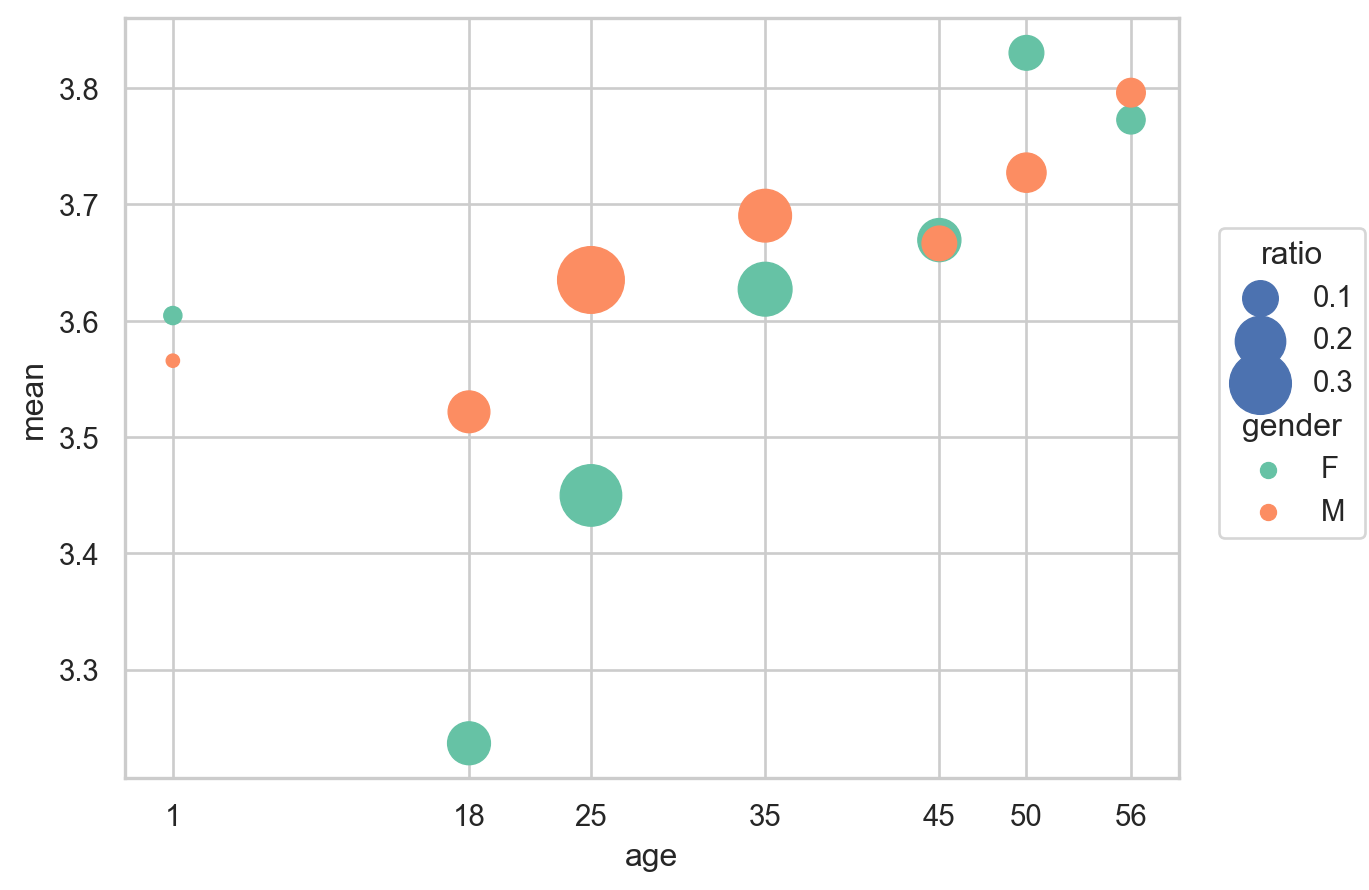

In [63]:
#| echo: false
(
    so.Plot(western_age_gender, x="age", y="mean", pointsize="ratio", color="gender")
    .add(so.Dot())
    .scale(pointsize=(5, 25), color="Set2")
    .scale(x=so.Continuous().tick(at=[1, 18, 25, 35, 45, 50, 56]))
    .theme({**sns.axes_style("whitegrid")})
)

10.4 이제 모든 장르를 한눈에 살펴보기 위해 `facet`을 이용해 다음과 같이 시각화해보세요.

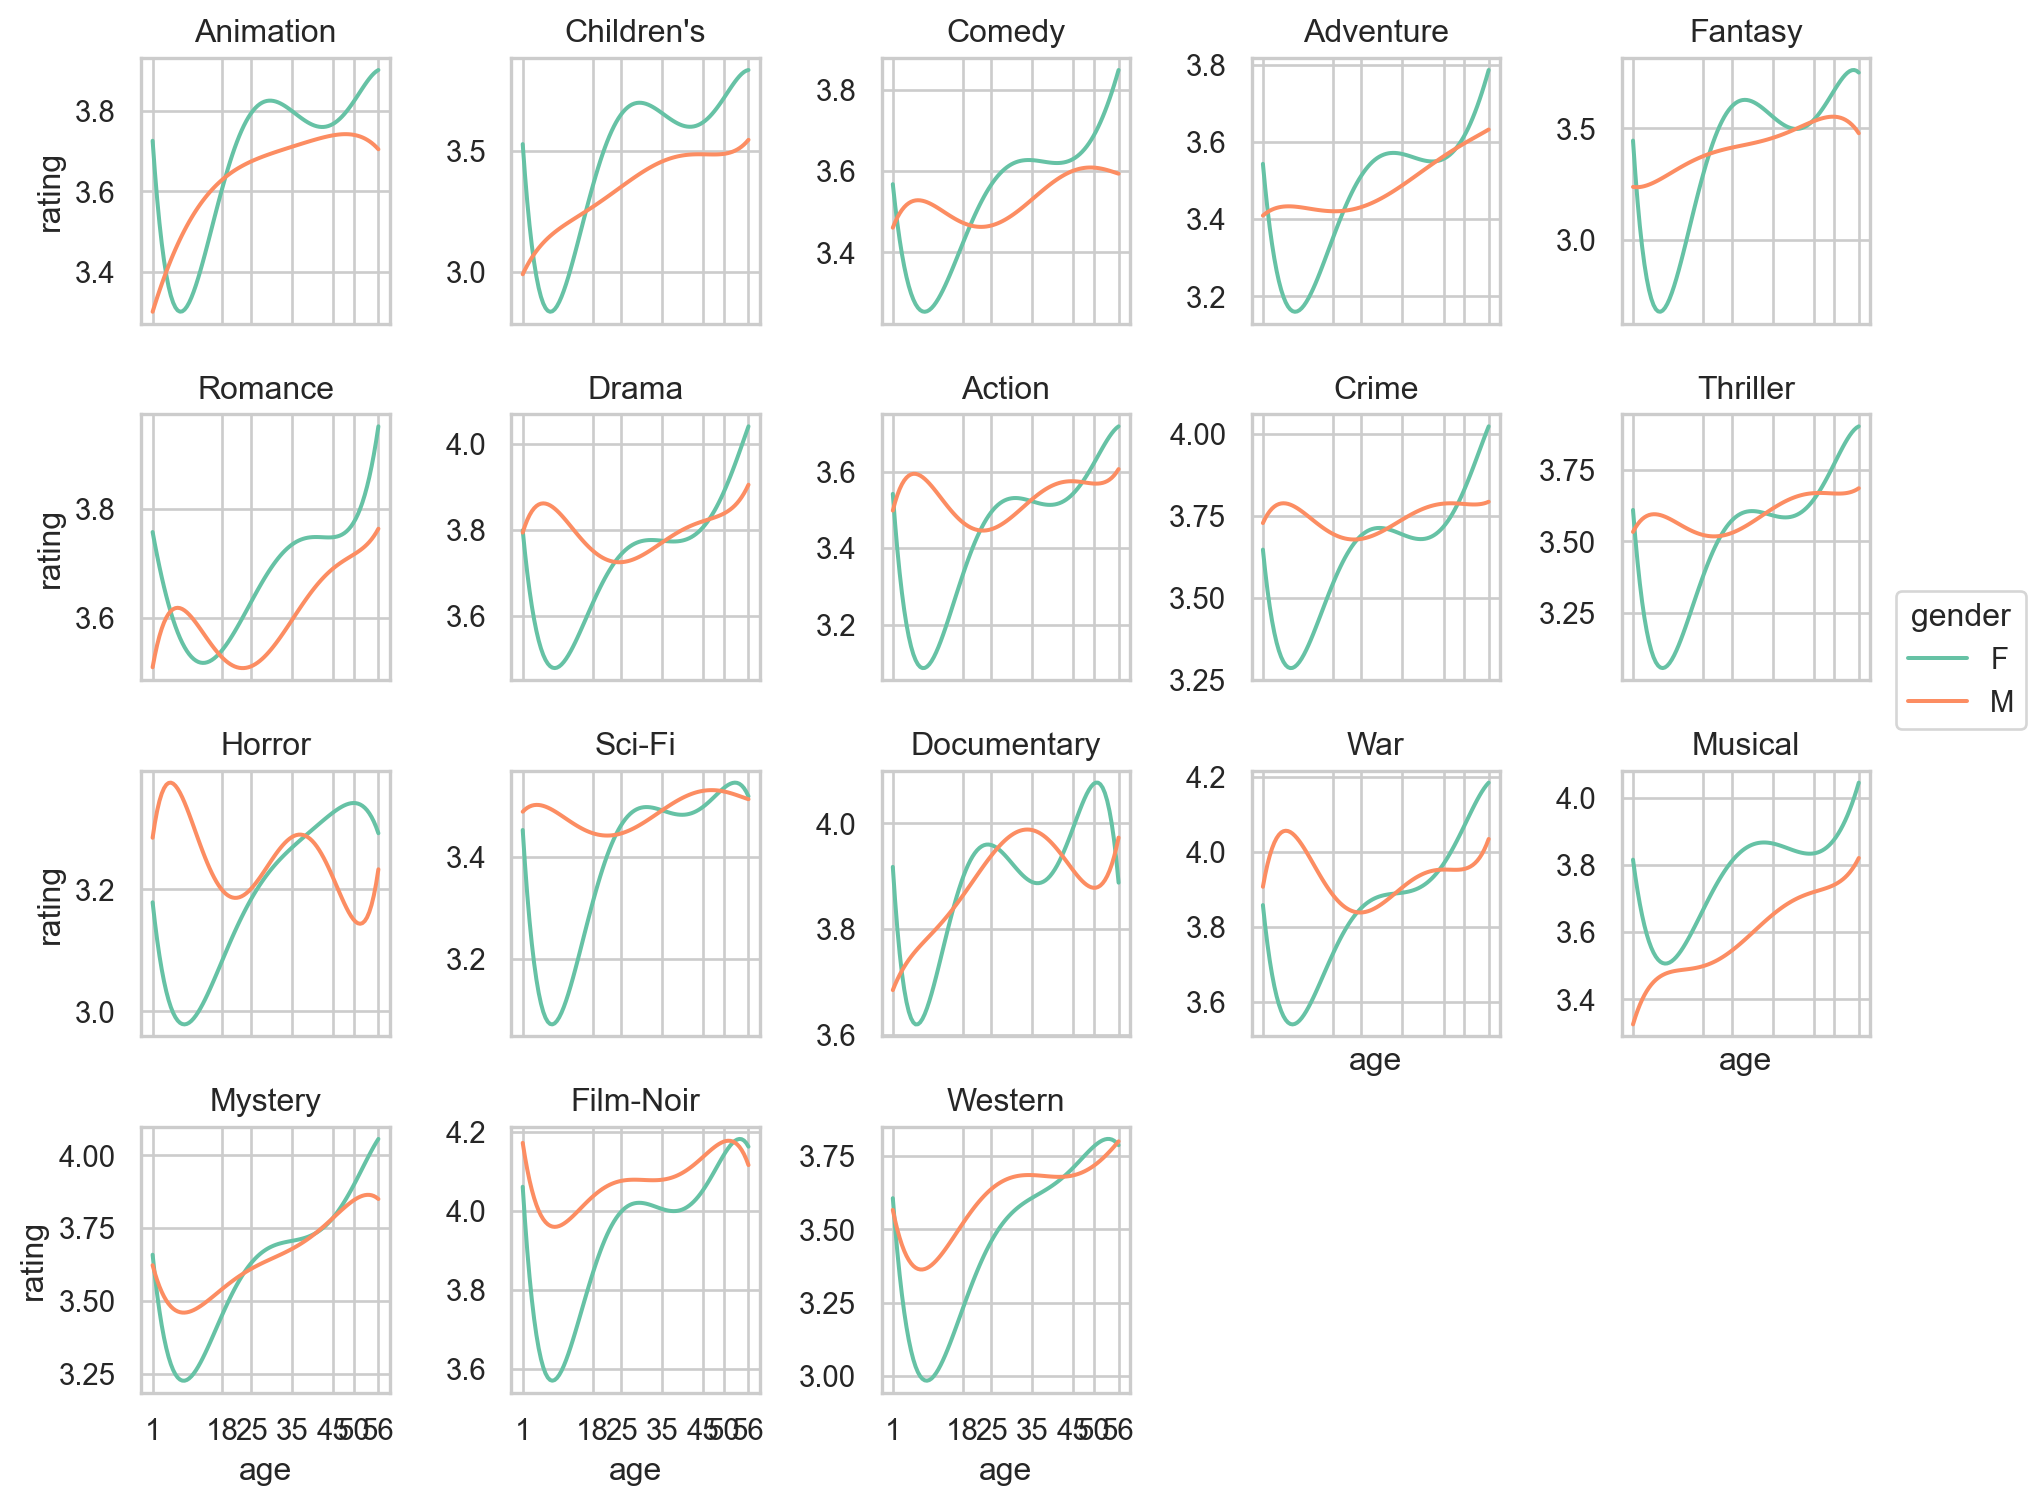

In [64]:
#| echo: false
(
    so.Plot(movies_long_all, x="age", y="rating", color="gender")
    .add(so.Line(), so.PolyFit(5))
    .facet("genres", wrap=5)
    .share(y=False)
    .layout(size=(10, 8))
    .scale(color="Set2")
    .theme({**sns.axes_style("whitegrid")})
    .scale(x=so.Continuous().tick(at=[1, 18, 25, 35, 45, 50, 56]))
)

11. 영화 제목에 있는 출시년도를 추출해 이용하기 위해 다음 코드를 활용하세요.

In [68]:
#| echo: false
pd.options.display.max_rows = 6

In [69]:
movies["year"] = movies["title"].str.extract(r'\((\d{4})\)').astype("int")
movies

      movie_id                    title                        genres  year
0            1         Toy Story (1995)   Animation|Children's|Comedy  1995
1            2           Jumanji (1995)  Adventure|Children's|Fantasy  1995
2            3  Grumpier Old Men (1995)                Comedy|Romance  1995
...        ...                      ...                           ...   ...
3880      3950         Tigerland (2000)                         Drama  2000
3881      3951  Two Family House (2000)                         Drama  2000
3882      3952    Contender, The (2000)                Drama|Thriller  2000

[3883 rows x 4 columns]

- 11.1 먼저 출시년도별로 얼마나 영화가 있는지 분포를 살펴보세요.
- 11.2 출시년도가 없는 영화가 있는가요?
- 11.3 오래된 영화일수록 나이든 사람들의 시청 비율이 높을지에 대해 분포를 살펴보세요.

  - 나이를 다음과 같이 카테고리화하여 분석합니다.
    
      ```python
      .assign(
          age = lambda x: pd.Categorical(x.age, categories=["1", "18", "25", "35", "45", "50", "56"], ordered=True)
      )
      ```
  - 나이를 row에 facet하는 방식으로 분포를 살펴보세요.

12. 10년 기준으로 년대를 정했을 때, 년대에 따라 장르들의 비율이 어떻게 변화했는지 살펴봅니다.
    
- 예를 들어, 코메디 장르의 경우 아래 플랏처럼 1920년대에 다른 장르에 비해 상대적으로 높은 비율을 보이다가 1950년대까지는 쭉 낮아지다 다시 증가하는 비율을 보입니다.
- 장르별로 facet을 하여 모든 장르들의 비율 변화를 그려보세요.
- 우선 년대를 다음 방식으로 만든 후, 예를 들어, 1990-1999년은 1990이 되도록 한 후

    ```python
    movies.assign(
        decade = lambda x: np.floor(x.year / 10) * 10  # np.floor(): 내림
    )
    ```
- `decade`와 `genres`에 대해 `pd.crosstab()`을 적용하여 비율에 대한 테이블을 만든 후 그려보세요.
- `pd.crosstab()`의 파라미터를 확인해서 **비율**을 구하세요.


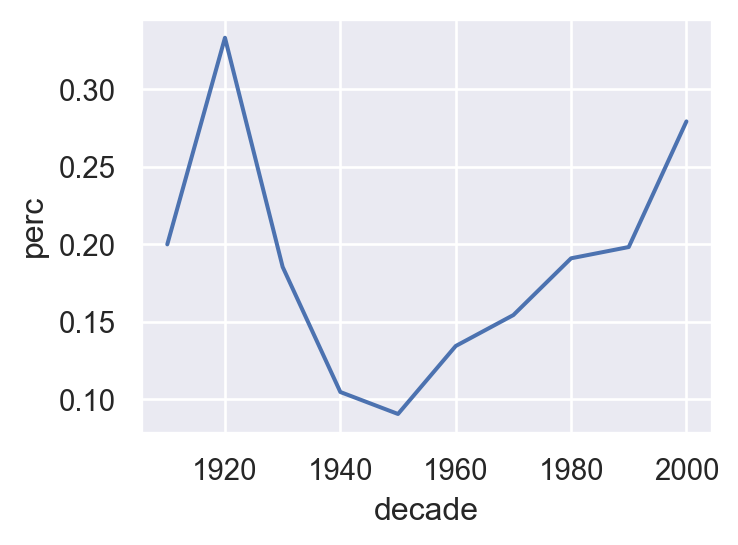

In [162]:
#| echo: false
(
    so.Plot(decade_perc.reset_index(name="perc").query('genres == "Comedy"'), x="decade", y="perc")
    .add(so.Line())
    .layout(size=(4, 3))
)

13.  매니아적 성향을 파악해 봅니다. 
    
- 13.1 유저들 중에는 소수의 특정 장르만을 시청할 수 있는데, 다시 말해서 유저별 장르의 편향성을 알아볼 수 있는 지표를 만들어 특정 장르만을 독식하는 유저들을 파악해보는 방식에 대해 아이디어를 기술해보고, 코드로 구현할 수 있는 스텝을 대략 제시해보세요.

- 13.2 구현된 코드로 실행한 결과를 표시해보세요.

    예를 들어, 유저별로 장르마다 몇 %씩을 평가했는지와 전체 유저의 장르별 평가 비율을 구해 상대적으로 유저들이 얼마나 치우쳐 장르를 소비하는 지를 알아보는 방식도 좋겠습니다.
